In [1]:
import pandas as pd
from functools import reduce
import numpy as np
import gc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_feather("../data/finaldata/fact_data.feather")

In [3]:
tmp_data = data._get_numeric_data()
tmp_data = tmp_data.fillna(0)
tmp_data.head()

,product_volume,number_of_blood_product_units_processed,number_of_donation_units_processed,number_of_duplicated_donation_units,number_of_skipped_donation_barcodes,number_of_donation_alarms,number_of_alerts,number_of_duplicated_exception_units,number_of_reprocessed_units,number_of_inconclusive_sealed_units,number_of_unrecognized_barcodes,number_of_skipped_exception_barcodes,number_of_temp_out_of_range_exceptions,number_of_exception_alarms,procedure_duration_minutes,idle_time_duration_minutes,load_duration_minutes,unload_duration_minutes,load_idle_time_duration_minutes,run_duration_minutes,barcode_scan_duration_minutes,number_of_procedures,number_of_dummy_bags,number_of_barcode_scans,number_of_skipped_run_barcodes,start_basin_temperature,end_basin_temperature,max_basin_temperature,min_basin_temperature,run_number
0,94,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
1,64,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
3,180,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0
4,68,1,1,1,0,0,0,0,0,0,0,0,0,0,56.837234,0.0,32.056816,0.416667,0.671117,21.049999,6.171717,1,0,9,0,19.975,20.605,22.698999,19.961,1577.0


In [4]:
train_data, test_data = train_test_split(tmp_data, test_size=0.5)

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(train_data)

In [9]:
labels = kmeans.labels_

In [17]:
kmeans.fit(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))
y_kmeans = kmeans.predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))

[[  19.09080054]
 [6460.77589134]
 [1363.45702334]
 [3242.67382657]]


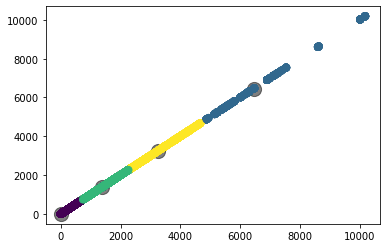

In [26]:
centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers, centers, c='black', s=200, alpha=0.5)
plt.scatter(train_data['run_duration_minutes'], train_data['run_duration_minutes'], c=y_kmeans, s=50, cmap='viridis')

In [27]:
kmeans.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))

-3768295414.80655

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))
plt.scatter(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int')[:,0], train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int')[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [7]:
kmeans.predict(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'))

ValueError: Incorrect number of features. Got 1 features, expected 30.

In [ ]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'm']

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1],
                c=col, marker='.', s=10)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c='b', s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
model.get_params()

In [ ]:
model.score(train_data['run_duration_minutes'].values.reshape(-1, 1).astype('int'), train_data['number_of_alerts'].astype('int'))